In [1]:
from baseline import *

FNC
	train      has 39978 rows and shapes (39978, 5).
	validation has  4997 rows and shapes (4997, 5).
	test       has  4997 rows and shapes (4997, 5).
LIAR
	train      has 10240 rows and shapes (10240, 14).
	validation has  1284 rows and shapes (1284, 14).
	test       has  1267 rows and shapes (1267, 14).


In [22]:
# load more features
train_df = ds(dataset = "FNC", type = "train")
train_X = train_df[[i for i in train_df.columns if "vector_" in i]]
train_y = train_df["label"]

val_df = ds(dataset = "FNC", type = "val")
val_X = val_df[[i for i in val_df.columns if "vector_" in i]]
val_y = val_df["label"]

test_df = ds(dataset = "FNC", type = "test")
test_X = test_df[[i for i in test_df.columns if "vector_" in i]]
test_y = test_df["label"]


train = torch.utils.data.TensorDataset(torch.tensor(train_X.values), torch.tensor(train_y.values))
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)

val_X, val_y = torch.tensor(val_X.values), torch.tensor(val_y.values)
val_X, val_y = val_X.to(device), val_y.to(device)

test_X, test_y = torch.tensor(test_X.values), torch.tensor(test_y.values)
test_X, test_y = test_X.to(device), test_y.to(device)

In [23]:
# same training loop
device = "cuda" if torch.cuda.is_available() else "cpu"
model = linearRegression(train_X.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()

Epoch: 0, train loss: 0.4340, val loss: 0.6858
            val accuracy: 0.6550
Epoch: 1, train loss: 0.5114, val loss: 0.6564
            val accuracy: 0.6622
Epoch: 2, train loss: 0.4522, val loss: 0.6671
            val accuracy: 0.6598
Epoch: 3, train loss: 0.4371, val loss: 0.6934
            val accuracy: 0.6630
Epoch: 4, train loss: 0.4247, val loss: 0.6661
            val accuracy: 0.6748
Epoch: 5, train loss: 0.3867, val loss: 0.7021
            val accuracy: 0.6866
Epoch: 6, train loss: 0.6520, val loss: 0.6964
            val accuracy: 0.6984
Epoch: 7, train loss: 0.2518, val loss: 0.7655
            val accuracy: 0.6938
Epoch: 8, train loss: 0.4548, val loss: 0.7542
            val accuracy: 0.7072
Epoch: 9, train loss: 0.3822, val loss: 0.7559
            val accuracy: 0.7012
Epoch: 10, train loss: 0.3841, val loss: 0.8109
            val accuracy: 0.6680
Epoch: 11, train loss: 0.4329, val loss: 0.8316
            val accuracy: 0.6464
Epoch: 12, train loss: 0.4585, val los

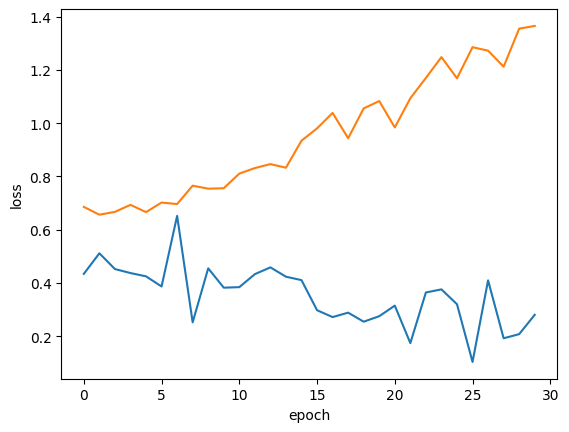

In [24]:
train_loss_records = []
val_loss_records = []
epoches = 30
for epoch in range(epoches):
    for X, y in train_dataloader:
        X = X.to(device).float()
        y = y.to(device)

        pred = model(X)
        loss = criterion(pred.float(), y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss_records.append(loss.cpu().detach())

    with torch.no_grad():
        pred = model(val_X)
        val_loss = criterion(pred.float(), val_y)
        val_accuracy = accuracy_score(val_y.cpu(), np.argmax(pred.cpu().numpy(),axis=1))
        print(f"""Epoch: {epoch}, train loss: {loss:.4f}, val loss: {val_loss:.4f}
            val accuracy: {val_accuracy:.4f}""")

        val_loss_records.append(val_loss.cpu().detach())

with torch.no_grad():
    test_pred = model(test_X)
    test_y, test_pred = test_y.cpu(), np.argmax(test_pred.cpu().numpy(),axis=1)
    test_accuracy = accuracy_score(test_y, test_pred)
    test_f1 = f1_score(test_y, test_pred)
    print(f"test accuracy: {test_accuracy} | test f1 score: {test_f1}")

torch.save(model, "FNC_model")

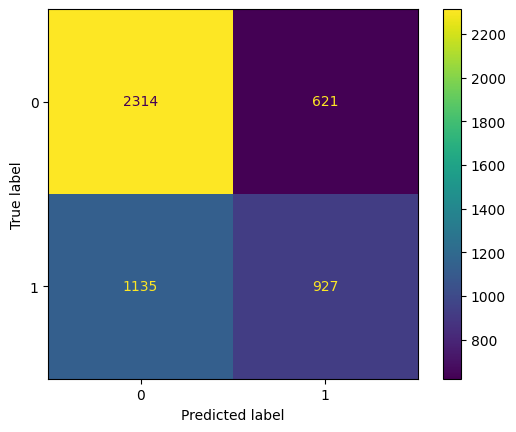

In [25]:
cm = confusion_matrix(test_y, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig("./plots/cm_FNC.png")

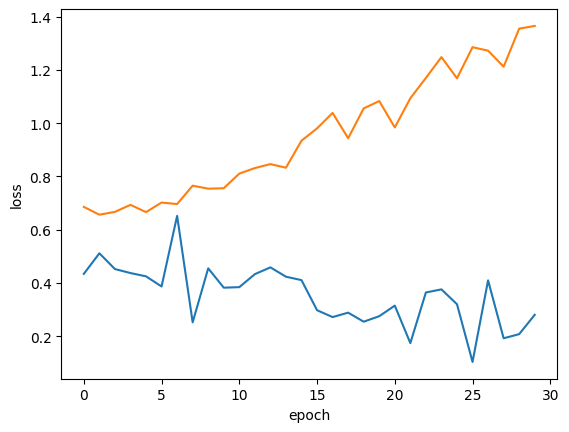

In [26]:
plt.plot(range(len(train_loss_records)), train_loss_records, label = "train")
plt.plot(range(len(val_loss_records)), val_loss_records, label = "validation")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('./plots/loss_FNC.png')
plt.legend(['train',"validation"])
plt.show()